# Part 5: Analyze Your Untappd Check-in Data

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, json, math, random
from mpl_toolkits.basemap import Basemap
from dateutil import parser as date_parser
%matplotlib inline

In [2]:
df = pd.read_csv('data/untappd_details_geocoded_timezone.csv', encoding='utf-8')
df['date_pacific_tz'] = df['date_pacific_tz'].map(lambda x: date_parser.parse(x))
df['date_local_tz'] = df['date_local_tz'].map(lambda x: date_parser.parse(x))
df.head()

,date_pacific_tz,beer_name,beer_style,brewery_name,brewery_place,brewery_type,rating,beer_avg_rating,brewery_avg_rating,beer_abv,...,venue_lon,venue_total_checkins,checkin_id,beer_url,brewery_url,venue_url,brewery_lat,brewery_lon,venue_timezone,date_local_tz
0,2016-07-04 18:59:34-07:00,McRed,Red Ale - American Amber / Red,Humboldt Regeneration,"McKinleyville, CA United States",Nano Brewery,3.75,3.25,3.77,5.4,...,NaN,NaN,332182456,https://untappd.com/b/humboldt-regeneration-mc...,https://untappd.com/w/humboldt-regeneration/49462,NaN,40.946515,-124.100621,America/Los_Angeles,2016-07-04 18:59:34-07:00
1,2016-07-03 19:00:03-07:00,Earth Thirst,IPA - Imperial / Double,Eel River Brewing Co.,"Fortuna, CA United States",Micro Brewery,2.50,3.68,3.56,8.2,...,-124.153,3649.0,331728849,https://untappd.com/b/eel-river-brewing-co-ear...,https://untappd.com/w/eel-river-brewing-co/481,https://untappd.com/v/eel-river-brewing-compan...,40.598187,-124.157276,America/Los_Angeles,2016-07-03 19:00:03-07:00
2,2016-07-03 18:58:48-07:00,Organic Amber Ale,Red Ale - American Amber / Red,Eel River Brewing Co.,"Fortuna, CA United States",Micro Brewery,2.50,3.36,3.56,4.8,...,-124.153,3649.0,331728103,https://untappd.com/b/eel-river-brewing-co-org...,https://untappd.com/w/eel-river-brewing-co/481,https://untappd.com/v/eel-river-brewing-compan...,40.598187,-124.157276,America/Los_Angeles,2016-07-03 18:58:48-07:00
3,2016-07-03 18:04:39-07:00,Emerald Triangle IPA,IPA - American,Eel River Brewing Co.,"Fortuna, CA United States",Micro Brewery,4.00,3.56,3.56,6.7,...,-124.153,3649.0,331692205,https://untappd.com/b/eel-river-brewing-co-eme...,https://untappd.com/w/eel-river-brewing-co/481,https://untappd.com/v/eel-river-brewing-compan...,40.598187,-124.157276,America/Los_Angeles,2016-07-03 18:04:39-07:00
4,2016-07-03 18:03:50-07:00,Blonde Ale,Blonde Ale,Eelriver Brewing Company,United States,Macro Brewery,3.50,3.54,3.59,5.8,...,-124.153,3649.0,331691575,https://untappd.com/b/eelriver-brewing-company...,https://untappd.com/w/eelriver-brewing-company...,https://untappd.com/v/eel-river-brewing-compan...,37.090240,-95.712891,America/Los_Angeles,2016-07-03 18:03:50-07:00


In [3]:
len(df)

1480

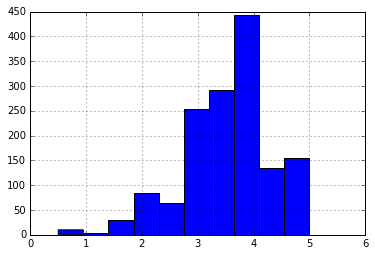

In [4]:
ax = df['rating'].hist()

In [5]:
df['beer_brewery'] = df['beer_name'] + ' | ' + df['brewery_name']

In [6]:
unique_beers = df.drop_duplicates(['beer_name', 'brewery_name'])

In [7]:
# the beers i hated the most
df.sort_values('rating', ascending=True)[['beer_name', 'brewery_name', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,rating
671,Coors Light,Coors Brewing Company,0.5
995,Bud Light Lime Cran-Brrr-Rita,Anheuser-Busch,0.5
1275,Natural Light,Anheuser-Busch,0.5
684,Bud Light,Anheuser-Busch,0.5
502,Virgin Craft Brewed Lager,MADD Virgin Drinks,0.5
523,Bitburger Drive,Bitburger Braugruppe,0.5
976,Brahma Malzbier,Ambev,0.5
1416,Miller Lite,Miller Brewing Company,1.0
994,Tecate,Cervecería Cuauhtémoc Moctezuma S.A. de C.V.,1.0
1380,Goldbräu / Stiegl Beer,Stieglbrauerei zu Salzburg,1.0


In [8]:
# the beers i loved the most
df.sort_values('rating', ascending=False)[['beer_name', 'brewery_name', 'rating']].drop_duplicates().head(25)

,beer_name,brewery_name,rating
507,Pabst Blue Ribbon,Pabst Brewing Company,5.00
1303,Pale Ale,Sierra Nevada Brewing Co.,5.00
122,Hop Knot,Four Peaks Brewing Company,5.00
717,Pliny the Elder,Russian River Brewing Company,5.00
720,Summer Solstice,Anderson Valley Brewing Company,5.00
725,Fresh Squeezed IPA,Deschutes Brewery,5.00
1290,Dragoon IPA,Dragoon Brewing Company,5.00
116,Blind Pig IPA,Russian River Brewing Company,5.00
114,Hofbräu Original,Staatliches Hofbräuhaus München,5.00
1461,Wipeout IPA,Port Brewing Company,5.00


In [9]:
# the beers i've had that the public has loved the most
df.sort_values('beer_avg_rating', ascending=False)[['beer_name', 'brewery_name', 'beer_avg_rating', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_avg_rating,rating
536,Pliny the Younger (2015),Russian River Brewing Company,4.71,5.00
537,Pliny the Younger,Russian River Brewing Company,4.70,5.00
717,Pliny the Elder,Russian River Brewing Company,4.57,5.00
101,Sucaba,Firestone Walker Brewing Company,4.37,3.75
935,Vintage (Barrel No 144) (2010),Brouwerij Rodenbach,4.37,4.00
1304,Stone Enjoy By 04.01.13 IPA,Stone Brewing,4.35,4.50
1011,Blind Pig IPA,Russian River Brewing Company,4.20,5.00
361,Hop Venom,Boneyard Beer Company,4.20,3.75
690,Xocoveza Mocha Stout,Stone Brewing,4.16,2.00
246,Born Yesterday Pale Ale (2015),Lagunitas Brewing Company,4.14,4.25


In [10]:
# the beers i've had that the public has hated the most
df.sort_values('beer_avg_rating', ascending=True)[['beer_name', 'brewery_name', 'beer_avg_rating', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_avg_rating,rating
502,Virgin Craft Brewed Lager,MADD Virgin Drinks,1.15,0.50
1275,Natural Light,Anheuser-Busch,1.97,0.50
518,St. Pauli Girl NA,Brauerei Beck,1.97,2.00
741,Big Flats 1901,"Winery Exchange, World Brews",2.08,1.50
976,Brahma Malzbier,Ambev,2.13,0.50
481,Dali V8,Dali Beer Group,2.15,2.25
975,Skol,Ambev,2.18,2.00
478,Snow,China Resources Snow Breweries,2.19,2.50
482,Dali V6,Dali Beer Group,2.19,1.75
523,Bitburger Drive,Bitburger Braugruppe,2.19,0.50


In [11]:
# beers i've had that the public has checked-in the most
df.sort_values('beer_total_checkins', ascending=False)[['beer_name', 'brewery_name', 'beer_total_checkins', 'rating']].drop_duplicates().head(10)

,beer_name,brewery_name,beer_total_checkins,rating
310,Guinness Draught,Guinness,1200000.0,4.0
684,Bud Light,Anheuser-Busch,1110000.0,0.5
1416,Miller Lite,Miller Brewing Company,1020000.0,1.0
644,Traditional Lager,Yuengling Brewery,962747.0,3.5
671,Coors Light,Coors Brewing Company,894922.0,0.5
407,IPA,Lagunitas Brewing Company,799327.0,4.0
993,Two Hearted Ale,Bell's Brewery,783241.0,3.0
455,Heineken,Heineken,724133.0,3.0
888,Pabst Blue Ribbon,Pabst Brewing Company,717708.0,5.0
1078,Belgian White,Blue Moon Brewing Company,694049.0,3.0


In [12]:
# places i've checked into that the public has checked into the most
df.sort_values('venue_total_checkins', ascending=False)[['venue_name', 'venue_place', 'venue_total_checkins']].drop_duplicates('venue_name').head(10)

,venue_name,venue_place,venue_total_checkins
717,Russian River Brewing Company,NaN,178496.0
689,Stone Brewing World Bistro & Gardens,NaN,97547.0
898,Lagunitas Brewing Company,NaN,58920.0
1457,Toronado,NaN,53924.0
596,Arizona Wilderness Brewing Co.,NaN,49029.0
1170,Beer Revolution,NaN,46792.0
1021,City Beer Store,NaN,43325.0
962,The Rare Barrel,NaN,37977.0
154,Pizza Port Brewing Company,NaN,33970.0
1126,APEX,NaN,31450.0


In [13]:
# what styles have i had the most?
df['beer_style'].value_counts().head(10)

IPA - American                       281
Pale Ale - American                  148
Lager - North American Adjunct       124
Lager - Pale                          79
Pilsner - German                      65
Pilsner - Other                       60
Pilsner - Czech                       45
Red Ale - American Amber / Red        38
IPA - Session / India Session Ale     35
IPA - Imperial / Double               34
Name: beer_style, dtype: int64

In [14]:
# what basic styles have i had the most?
df['beer_style'].map(lambda x: str(x).split(' - ')[0]).value_counts().head(10)

IPA                  382
Lager                315
Pale Ale             178
Pilsner              170
Red Ale               48
Kölsch                33
California Common     22
Golden Ale            21
Strong Ale            18
Stout                 18
Name: beer_style, dtype: int64

In [15]:
# what beers have i checked-in the most?
df['beer_brewery'].value_counts().head(10)

Pabst Blue Ribbon | Pabst Brewing Company             44
Pale Ale | Sierra Nevada Brewing Co.                  21
Hop Knot | Four Peaks Brewing Company                 17
Trumer Pils | Trumer                                  17
Anchor Steam Beer | Anchor Brewing Company            16
IPA | Lagunitas Brewing Company                       15
Hamm's Premium | Miller Brewing Company               11
Hofbräu Original | Staatliches Hofbräuhaus München    10
Kölsch | Jupiter                                      10
Kilt Lifter | Four Peaks Brewing Company              10
Name: beer_brewery, dtype: int64

In [16]:
# what breweries have i checked into the most?
df['brewery_name'].value_counts().head(10)

Sierra Nevada Brewing Co.          73
Four Peaks Brewing Company         56
Pabst Brewing Company              55
Lagunitas Brewing Company          42
Deschutes Brewery                  34
Jupiter                            31
Ninkasi Brewing Company            22
Anchor Brewing Company             21
SanTan Brewing Company             19
Anderson Valley Brewing Company    18
Name: brewery_name, dtype: int64

In [17]:
# what breweries have i had the greatest number of unique beers from?
unique_beers['brewery_name'].value_counts().head(10)

Sierra Nevada Brewing Co.           39
Lagunitas Brewing Company           23
Deschutes Brewery                   16
Four Peaks Brewing Company          15
Stone Brewing                       13
Ninkasi Brewing Company             13
SanTan Brewing Company              12
New Belgium Brewing Company         11
Green Flash Brewing Company          8
Firestone Walker Brewing Company     8
Name: brewery_name, dtype: int64

In [18]:
# what unique beers have i had from four peaks?
unique_beers[unique_beers['brewery_name']=='Four Peaks Brewing Company'][['date_local_tz', 'beer_name', 'rating']]

,date_local_tz,beer_name,rating
91,2016-05-02 20:17:30-07:00,Gumleaf Schooner,4.50
92,2016-05-02 19:23:14-07:00,Short Hop,4.50
95,2016-05-01 19:05:37-07:00,Hop Knot,5.00
97,2016-05-01 16:39:45-07:00,8th Street Pale Ale,4.00
234,2015-12-26 23:03:33-07:00,Raj IPA,4.00
237,2015-12-26 19:24:05-07:00,White Ale,2.75
249,2015-12-22 23:01:59-07:00,Double Knot,4.00
315,2015-10-03 14:51:03-07:00,Lefty's Lager,3.75
316,2015-10-03 14:49:41-07:00,Western Rivers English Summer Ale,3.75
317,2015-10-03 14:01:10-07:00,Single Tank Series: Hoppy Pils,4.50


## Look at hour and day of the week

In [19]:
df['date_local_tz'].map(lambda x: x.hour).value_counts()

20    197
19    181
18    157
21    156
22    121
17    114
16    101
14     99
15     80
13     75
23     73
12     56
0      25
11     12
1      12
9       7
8       4
10      3
7       3
3       2
2       2
Name: date_local_tz, dtype: int64

In [20]:
df['date_local_tz'].map(lambda x: x.weekday()).value_counts()

5    372
4    273
6    220
3    188
2    155
0    151
1    121
Name: date_local_tz, dtype: int64

## Map the breweries I have tried

In [21]:
df_breweries = df[[col for col in df.columns if 'brewery_' in col]]
df_breweries = df_breweries.drop_duplicates(['brewery_name', 'brewery_place'])
df_breweries = df_breweries.dropna(subset=['brewery_lat', 'brewery_lon'], how='any')
print(len(df_breweries))
df_breweries.head()

442


,brewery_name,brewery_place,brewery_type,brewery_avg_rating,brewery_total_checkins,brewery_url,brewery_lat,brewery_lon
0,Humboldt Regeneration,"McKinleyville, CA United States",Nano Brewery,3.77,816.0,https://untappd.com/w/humboldt-regeneration/49462,40.946515,-124.100621
1,Eel River Brewing Co.,"Fortuna, CA United States",Micro Brewery,3.56,62611.0,https://untappd.com/w/eel-river-brewing-co/481,40.598187,-124.157276
4,Eelriver Brewing Company,United States,Macro Brewery,3.59,153.0,https://untappd.com/w/eelriver-brewing-company...,37.090240,-95.712891
7,Six Rivers Brewery,"McKinleyville, CA United States",Micro Brewery,3.54,21267.0,https://untappd.com/w/six-rivers-brewery/1148,40.946515,-124.100621
10,Mad River Brewing Company,"Blue Lake, CA United States",Micro Brewery,3.57,84564.0,https://untappd.com/w/mad-river-brewing-compan...,40.882907,-123.983949


In [22]:
def random_in_range(lower_range, upper_range):
    return random.random() * (upper_range - lower_range) + lower_range

# jitter either a lat or a long within n kms of original
def jitter(val, kms=1):
    rad_Earth = 6378.16
    one_degree = (2 * math.pi * rad_Earth) / 360
    one_km = 1 / one_degree
    return random_in_range(val - (kms * one_km), val + (kms * one_km))

# jitter a lat-long coordinate pair within n kms of the original location
def jitter_lat_lon(lat, lon, kms=1):
    new_lat = jitter(lat)
    new_lon = jitter(lon)
    return new_lat, new_lon

# demonstrate
print(jitter_lat_lon(34.052234, -118.243685))
print(jitter(34.052234))

(34.05757688090262, -118.23908863522406)
34.04587337208748


In [23]:
df_breweries['brewery_lat'] = df_breweries['brewery_lat'].map(jitter)
df_breweries['brewery_lon'] = df_breweries['brewery_lon'].map(jitter)

In [24]:
# define map colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#eaeaea'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

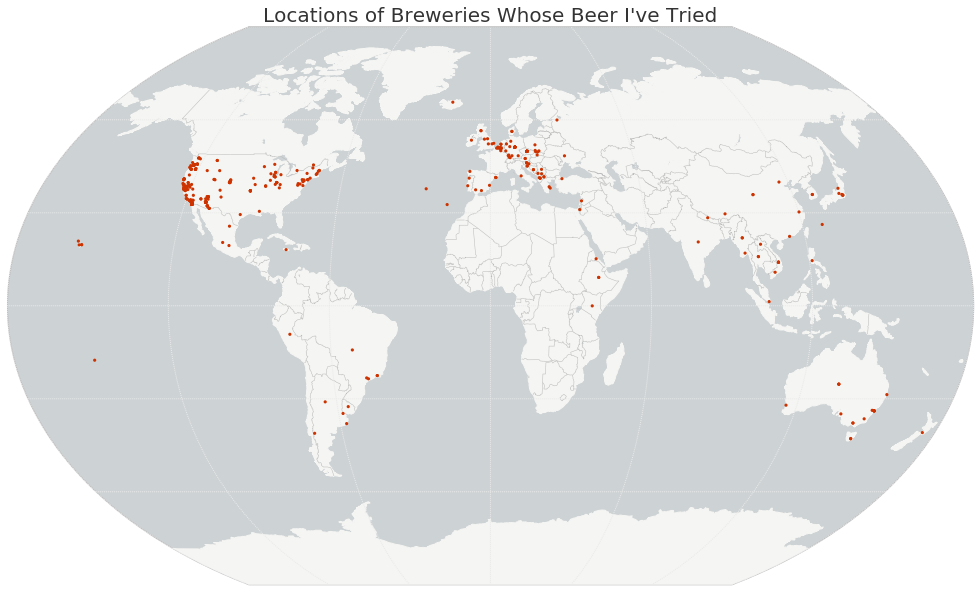

In [25]:
# create the plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, axisbg='#ffffff', frame_on=False)
ax.set_title('Locations of Breweries Whose Beer I\'ve Tried', fontsize=20, color='#333333')

# draw the basemap and its features
m = Basemap(projection='kav7', lon_0=0, resolution='l', area_thresh=10000)
m.drawmapboundary(color=border_color, fill_color=water_color)
m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

# project our points and scatter plot them
x, y = m(df_breweries['brewery_lon'].values, df_breweries['brewery_lat'].values)
m.scatter(x, y, s=10, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

# show the map
plt.savefig('images/brewery_location_world_map.png', dpi=180, bbox_inches='tight', pad_inches=0.2)
plt.show()

## Leaflet

In [26]:
# determine how many times each place appears in dataset, and break latlng into discrete lat and long
place_counts = df_breweries['brewery_place'].value_counts()
df_breweries['place_count'] = df_breweries['brewery_place'].map(lambda x: place_counts[x])

In [27]:
# create html list of artists from each place
features = []
for brewery_place in df_breweries['brewery_place'].unique():
    
    # how many breweries to show before saying "...and n more"
    num_to_show = 3
    line_break = '<br />'
    breweries = ''
    
    place_count = place_counts[brewery_place]
    names = df_breweries[df_breweries['brewery_place']==brewery_place]['brewery_name']
    
    if place_count <= num_to_show:
        for name in names:
            breweries = '{}{}{}'.format(breweries, name, line_break)
            
    else:
        for name in names[0:num_to_show]:
            breweries = '{}{}{}'.format(breweries, name, line_break)
        breweries = '{}...and {} more'.format(breweries, place_count - num_to_show)
        
    features.append([brewery_place, breweries])

df_leaflet = pd.DataFrame(features, columns=['brewery_place', 'breweries'])
df_leaflet.head()

,brewery_place,breweries
0,"McKinleyville, CA United States",Humboldt Regeneration<br />Six Rivers Brewery<...
1,"Fortuna, CA United States",Eel River Brewing Co.<br />
2,United States,Eelriver Brewing Company<br />Sufferfest Beer ...
3,"Blue Lake, CA United States",Mad River Brewing Company<br />
4,"Arcata, CA United States",Redwood Curtain Brewing Company<br />


In [28]:
# add lat and long back to the dataframe
place_lat_lon = {}
df_unique = df_breweries[['brewery_place', 'brewery_lat', 'brewery_lon']].drop_duplicates(subset='brewery_place')
for label in df_unique.index:
    place_lat_lon[df_unique.loc[label, 'brewery_place']] = (df_unique.loc[label, 'brewery_lat'], df_unique.loc[label, 'brewery_lon'])
    
df_leaflet['brewery_lat'] = df_leaflet['brewery_place'].map(lambda x: place_lat_lon[x][0])
df_leaflet['brewery_lon'] = df_leaflet['brewery_place'].map(lambda x: place_lat_lon[x][1])
df_leaflet.head()

,brewery_place,breweries,brewery_lat,brewery_lon
0,"McKinleyville, CA United States",Humboldt Regeneration<br />Six Rivers Brewery<...,40.942406,-124.095770
1,"Fortuna, CA United States",Eel River Brewing Co.<br />,40.597260,-124.161645
2,United States,Eelriver Brewing Company<br />Sufferfest Beer ...,37.090439,-95.720821
3,"Blue Lake, CA United States",Mad River Brewing Company<br />,40.878514,-123.982036
4,"Arcata, CA United States",Redwood Curtain Brewing Company<br />,40.867860,-124.089890


In [29]:
# function to write the dataframe out to geojson
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [30]:
geojson = df_to_geojson(df_leaflet, df_leaflet.columns, lat='brewery_lat', lon='brewery_lon')

# save the geojson result to a file
output_filename = 'leaflet/untappd-brewery-dataset.js'
with open(output_filename, 'w') as output_file:
    output_file.write('var dataset = {};'.format(json.dumps(geojson)))
    
# how many features did we save to the geojson file?
print('{:,} geotagged features saved to file'.format(len(geojson['features'])))

272 geotagged features saved to file
